In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('Credit Card Customer Data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [26]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [28]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [29]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [30]:
df[df.duplicated(subset=['Customer Key'], keep=False)].sort_values('Customer Key')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [31]:
df_no_duplicate= df.drop_duplicates(subset=['Customer Key'], keep='first')
df_no_duplicate.reset_index(inplace=True)
df_no_duplicate.shape

(655, 8)

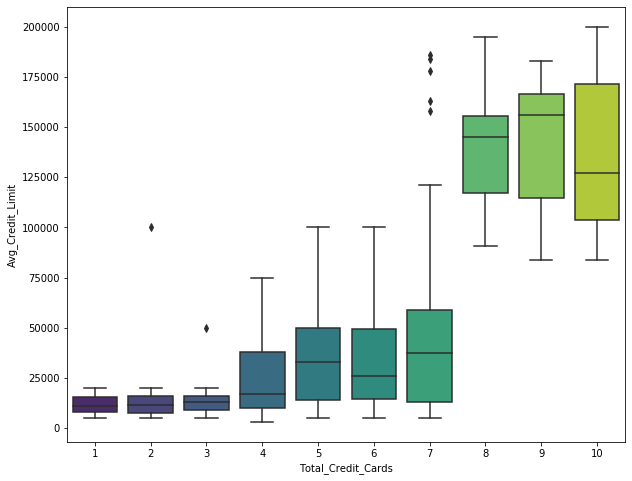

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Total_Credit_Cards', y='Avg_Credit_Limit', data=df_no_duplicate, palette='viridis')

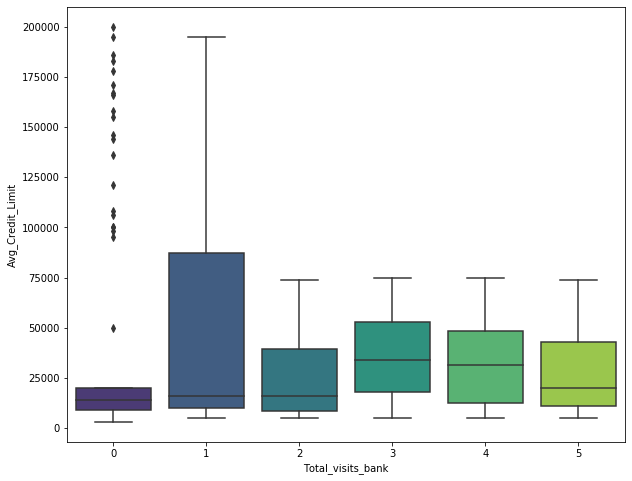

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Total_visits_bank', y='Avg_Credit_Limit', data=df_no_duplicate, palette='viridis')

In [45]:
df_no_duplicate= df_no_duplicate.drop(['Sl_No', 'Customer Key'], axis=1)
df_no_duplicate.drop(['index'],axis=1, inplace=True)

In [47]:
df_no_duplicate.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


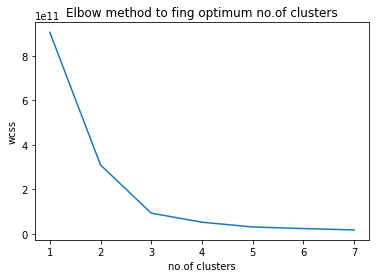

In [48]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,8):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_no_duplicate)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8), wcss)
plt.xlabel('no.of clusters')
plt.ylabel('wcss')
plt.title('Elbow method to fing optimum no.of clusters')
plt.show()

In [52]:
kmeans= KMeans(n_clusters=3, init='k-means++', random_state=42)
y_means= kmeans.fit_predict(df_no_duplicate)

In [53]:
y_means

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
kmeans.cluster_centers_


array([[5.69518717e+04, 5.72192513e+00, 3.21390374e+00, 1.56684492e+00,
        2.05347594e+00],
       [1.38418605e+04, 3.88139535e+00, 2.20930233e+00, 2.31860465e+00,
        4.50232558e+00],
       [1.53342105e+05, 8.78947368e+00, 5.78947368e-01, 1.09736842e+01,
        1.02631579e+00]])

In [56]:
df_no_duplicate['cluster_no']= y_means

In [57]:
df_no_duplicate.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_no
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,0
3,30000,5,1,1,4,1
4,100000,6,0,12,3,0


In [59]:
df_no_duplicate['cluster_no'].value_counts()

1    430
0    187
2     38
Name: cluster_no, dtype: int64

In [67]:
df_no_duplicate[y_means==2]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_no
608,157000,9,1,14,1,2
610,163000,8,1,7,1,2
611,131000,9,1,10,1,2
613,136000,8,0,13,0,2
614,121000,7,0,13,2,2
615,158000,7,0,13,0,2
616,108000,10,0,15,1,2
617,166000,9,1,12,2,2
618,176000,10,1,15,2,2
619,166000,10,0,7,0,2


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


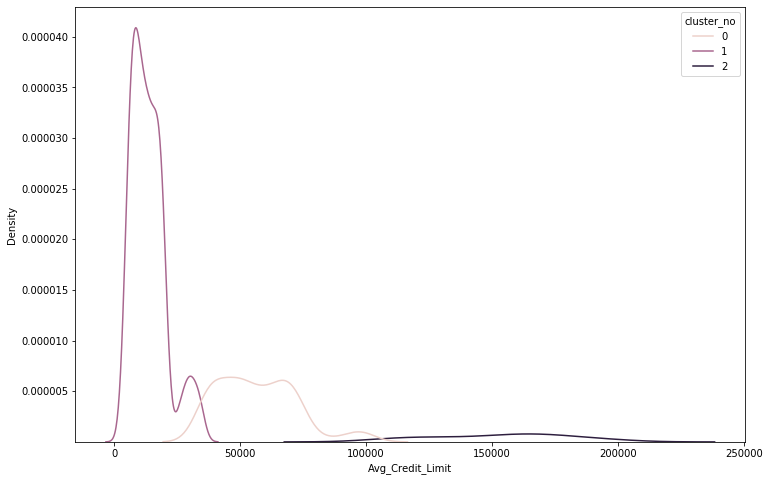

In [70]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_no_duplicate['Avg_Credit_Limit'], hue=df_no_duplicate['cluster_no'])

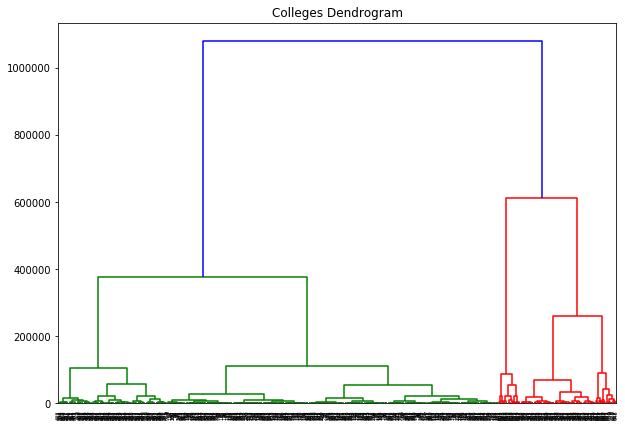

In [62]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Colleges Dendrogram')
dend=shc.dendrogram(shc.linkage(df_no_duplicate, method='ward'))

In [63]:
from sklearn.cluster import AgglomerativeClustering
ac1= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ac2= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ac3= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [64]:
from sklearn.metrics import silhouette_score
k=[2,3,4]

In [65]:
sill_score=[]
sill_score.append(silhouette_score(df_no_duplicate, ac1.fit_predict(df_no_duplicate)))
sill_score.append(silhouette_score(df_no_duplicate, ac2.fit_predict(df_no_duplicate)))
sill_score.append(silhouette_score(df_no_duplicate, ac3.fit_predict(df_no_duplicate)))

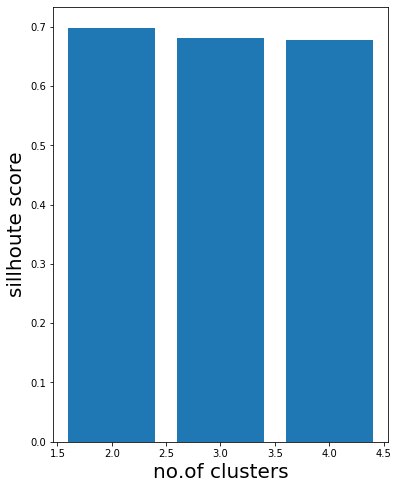

In [66]:
plt.figure(figsize=(6,8))
plt.bar(k, sill_score)
plt.xlabel('no.of clusters', fontsize=20)
plt.ylabel('sillhoute score',fontsize=20)
plt.show()